# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [2]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 36 (delta 9), reused 29 (delta 6), pack-reused 0
Receiving objects: 100% (36/36), 5.47 MiB | 31.81 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
# Question 1: Cleaning the Price variable

import numpy as np
import pandas as pd

In [4]:
bnbdf = pd.read_csv("/content/assignment2/data/airbnb_hw.csv")
print(bnbdf.shape, '\n') # List the dimensions of df
print(bnbdf.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(bnbdf.columns.to_list(), '\n') # First five column names

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating'] 



In [5]:
print(bnbdf.loc [1:50, ("Price")], "\n") #Gives me an overview of the observations for "Price"
print(bnbdf["Price"].unique(),'\n') #shows me some interesting observations from "Price"
print(bnbdf["Price"].value_counts(), '\n') #gives an overview of the number of values

1      37
2      28
3     199
4     549
5     149
6     250
7      90
8     270
9     290
10    170
11     59
12     49
13     68
14    285
15     75
16    145
17    100
18    150
19    700
20    125
21    175
22     90
23     40
24     89
25     95
26     99
27    149
28    499
29     99
30     99
31     99
32    125
33    170
34    120
35     79
36    125
37    110
38     89
39    180
40    180
41    143
42    230
43    350
44    135
45     85
46     85
47     85
48     60
49     70
50     55
Name: Price, dtype: object 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300

In [6]:
bnbdf["Price"]= bnbdf["Price"].str.replace(",", "") # I did this to remove the commas, from the values above 999, in order for it to count as a numeric variable


In [7]:
bnbdf["Price"] = pd.to_numeric(bnbdf["Price"], errors = "coerce") #coerces the variable to numeric instead of object

In [8]:
print(bnbdf.loc [101], ("Price")) #checking to see if the comma was removed

Host Id                                        8730
Host Since                                2/27/2009
Name                          Comfort & Convenience
Neighbourhood                             Manhattan
Property Type                           Condominium
Review Scores Rating (bin)                    100.0
Room Type                           Entire home/apt
Zipcode                                     10003.0
Beds                                            6.0
Number of Records                                 1
Number Of Reviews                                 4
Price                                          1990
Review Scores Rating                          100.0
Name: 101, dtype: object Price


In [9]:
bnbdf["Price"] = bnbdf["Price"].isnull() #Seeing if there are any missing values
print(sum(bnbdf["Price"]),'\n') #Tells me the total amount of missings; can see there are none!

0 



In [10]:
#B - Shark dataset cleaning
sdf = pd.read_csv("/content/assignment2/data/sharks.csv")

<ipython-input-10-32642fda2bdd>:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sdf = pd.read_csv("/content/assignment2/data/sharks.csv")


In [11]:
print(sdf.loc [1:50, ("Type")], "\n")
print(sdf["Type"].unique(),'\n')
print(sdf["Type"].value_counts(), '\n')

1         Provoked
2       Unprovoked
3       Unprovoked
4       Unprovoked
5       Unprovoked
6       Unprovoked
7       Unprovoked
8       Unprovoked
9     Questionable
10      Unprovoked
11      Unprovoked
12      Unprovoked
13      Unprovoked
14      Unprovoked
15      Unprovoked
16        Provoked
17    Questionable
18      Unprovoked
19      Unprovoked
20      Unprovoked
21      Unprovoked
22    Questionable
23        Provoked
24      Unprovoked
25        Provoked
26      Unprovoked
27      Unprovoked
28      Watercraft
29    Questionable
30      Unprovoked
31        Provoked
32      Unprovoked
33      Unprovoked
34      Unprovoked
35      Unprovoked
36      Unprovoked
37      Unprovoked
38        Provoked
39      Unprovoked
40      Unprovoked
41      Unprovoked
42      Unprovoked
43      Unprovoked
44      Unprovoked
45      Unprovoked
46      Unprovoked
47        Provoked
48      Unprovoked
49      Unprovoked
50      Unprovoked
Name: Type, dtype: object 

['Unprovoked' 'Provoke

In [12]:
sdf["Type"] = sdf["Type"].replace (["Invalid", "Unconfirmed", "Unverified", "Under investigation"], np.nan) #I replaced these obervsations with missings, because they all cannot be determined. I left questionable out, because I saw it still involves a shark attack, but its undertermined if it was human remains that were eaten after some other fatal incident.
print(sdf["Type"].value_counts(), '\n')

Unprovoked      4716
Provoked         593
Sea Disaster     239
Watercraft       142
Boat             109
Boating           92
Questionable      10
Boatomg            1
Name: Type, dtype: int64 



Unprovoked      4716
Provoked         593
Watercraft       583
Questionable      10
Name: Type, dtype: int64 



<Axes: >

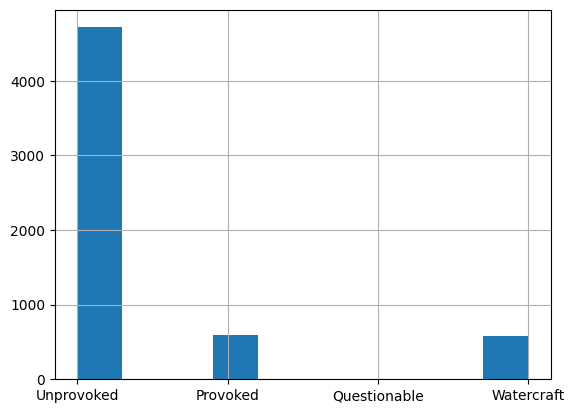

In [13]:
sdf["Type"] = sdf["Type"].replace(["Sea Disaster", "Watercraft", "Boat", "Boating", "Boatomg"], "Watercraft") #All of these observations can be put into one category to make the data more digestible. I'm not sure of "Boatomg" which was only one observation was a typo or not. I decided to interpret it as a boat.
print(sdf["Type"].value_counts(), '\n')
sdf["Type"].hist(bins = 10) #I just wanted to see if the data seemed easier to understand. It annoys me how Questionable isn't there, but it is a small amount of observations.

In [19]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
df = df.rename(columns = {"WhetherDefendantWasReleasedPretrial": "Released"}) #Renamed column because its way too long

In [23]:
print(df.loc [1:50, ("Released")], "\n") #Gives me an overview of the observations for "Price"
print(df["Released"].unique(),'\n') #shows me some interesting observations from "Price"
print(df["Released"].value_counts(), '\n') #gives an overview of the number of values
print(df.loc [32], ("Released"))

1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     1.0
7     1.0
8     0.0
9     1.0
10    1.0
11    0.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    0.0
22    1.0
23    1.0
24    1.0
25    0.0
26    0.0
27    0.0
28    0.0
29    1.0
30    0.0
31    0.0
32    NaN
33    1.0
34    0.0
35    1.0
36    1.0
37    1.0
38    0.0
39    1.0
40    0.0
41    0.0
42    1.0
43    1.0
44    1.0
45    1.0
46    0.0
47    1.0
48    1.0
49    NaN
50    NaN
Name: Released, dtype: float64 

[nan  0.  1.] 

1.0    19154
0.0     3801
Name: Released, dtype: int64 

InternalStudyID                                                                                          CDI00143
REQ_REC#                                                                                                       35
Defendant_Sex                                                                                                   M
Defendant_Race                                      

In [24]:
df["Released"] = df["Released"].replace( [9], np.nan)
print(df["Released"].value_counts(), '\n')


1.0    19154
0.0     3801
Name: Released, dtype: int64 



In [ ]:
df = df.rename(columns = {"ImposedSentenceAllChargeInContactEvent": ""})

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. Accourding to the US Census, they gather data on race based off of self-identification, in which people are sent a survey.
https://www.census.gov/topics/population/race.html#:~:text=The%20Census%20Bureau%20collects%20race,more%20than%20one%20race%20group.

2. We gather this data because it gives us insight into the demographics of the United States. In particular, we can create visualizations that depict the diversity of races in various states. This large pool of data can also be turned into visualizations that can help us understand significant numbers, and what they may imply. Census data is also critical overall for the U.S. aOne specific example, Black individuals tend to be overrepresented for their contribution to the crime rate in America, because their smaller population is not factored in. Similarly, White people are underrepresented for their crimes because they make up the majority of the population. Additionally, it helps determine how federal funds are distributed to people, which is critical. These stats can give important insight into the overall distribution of races, and how diverse our society really is. If the data quality is off, it can misrepresent the entire population. Certain groups of races can be excluded which is misleading.

3. I like how for the 2020 census they made sure to include more options for ethic groups such as "Middle Eastern" or "Sikh" and tried to be more accurate in how they are classified.

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.